# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [11]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Libraries for data preparation and model building
# import *

# Setting global constants to ensure notebook results are reproducible
# PARAMETER_CONSTANT = ###

import warnings
warnings.filterwarnings('ignore')

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [5]:
#Load train data
df_train = pd.read_csv("df_train.csv", index_col=0)

In [14]:
#Brief view of data
df_train.head(10)

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.000000,1.000000,0.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.000000,1.000000,0.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.000000,1.000000,0.0,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.000000,1.000000,0.0,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.000000,0.333333,0.0,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667
5,2015-01-01 18:00:00,1.000000,level_7,0.0,1.000000,69.666667,67.333333,12.333333,0.666667,0.0,...,274.639229,284.165625,277.919000,277.919000,284.165625,277.919000,282.077844,274.639229,274.639229,6842.000000
6,2015-01-01 21:00:00,1.000000,level_8,0.0,1.000000,83.666667,63.333333,16.333333,1.000000,0.0,...,268.287000,283.420333,274.295437,274.295437,283.420333,274.295437,277.637000,268.287000,268.287000,10760.333333
7,2015-01-02 00:00:00,1.000000,level_9,0.0,1.000000,83.666667,64.000000,8.666667,1.333333,0.0,...,266.882333,282.474000,272.903167,272.903167,282.474000,272.903167,276.457333,266.882333,266.882333,10866.000000
8,2015-01-02 03:00:00,1.000000,level_9,0.0,1.000000,86.000000,63.333333,5.333333,1.000000,0.0,...,266.226667,281.726667,271.780115,271.780115,281.726667,271.780115,276.151667,266.226667,266.226667,-1850.333333
9,2015-01-02 06:00:00,1.000000,level_9,0.0,1.333333,87.000000,63.666667,15.333333,1.000000,0.0,...,266.878000,281.803000,271.673667,271.673667,281.803000,271.673667,276.453000,266.878000,266.878000,-4002.333333


In [24]:
# View data quality
df_train.isnull().sum()

time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp  

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [30]:
#Replace all null values in Valencia_pressure column with the mean value    
mean_press_val = df_train['Valencia_pressure'].mean()
mean_press_val

def mean_value(data):
    if data is None :
        return mean_press_val
    return mean_press_val
df_train['Valencia_pressure'] = df_train['Valencia_pressure'].apply(mean_value)
df_train['Valencia_pressure'].isnull().sum()

0

In [31]:
# look at data statistics
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Madrid_wind_speed,8763.0,2.425729,1.850371e+00,0.000000,1.000000,2.000000,3.333333,1.300000e+01
Bilbao_rain_1h,8763.0,0.135753,3.749007e-01,0.000000,0.000000,0.000000,0.100000,3.000000e+00
Valencia_wind_speed,8763.0,2.586272,2.411190e+00,0.000000,1.000000,1.666667,3.666667,5.200000e+01
Seville_humidity,8763.0,62.658793,2.262123e+01,8.333333,44.333333,65.666667,82.000000,1.000000e+02
Madrid_humidity,8763.0,57.414717,2.433540e+01,6.333333,36.333333,58.000000,78.666667,1.000000e+02
Bilbao_clouds_all,8763.0,43.469132,3.255104e+01,0.000000,10.000000,45.000000,75.000000,1.000000e+02
Bilbao_wind_speed,8763.0,1.850356,1.695888e+00,0.000000,0.666667,1.000000,2.666667,1.266667e+01
Seville_clouds_all,8763.0,13.714748,2.427248e+01,0.000000,0.000000,0.000000,20.000000,9.733333e+01
Bilbao_wind_deg,8763.0,158.957511,1.020563e+02,0.000000,73.333333,147.000000,234.000000,3.593333e+02
Barcelona_wind_speed,8763.0,2.870497,1.792197e+00,0.000000,1.666667,2.666667,4.000000,1.266667e+01


In [32]:
# look at data statistics
df_train.skew()

Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure        0.000000
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_max        0.082672
Valencia_temp 

In [33]:
# look at data statistics
df_train.kurtosis()

Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          0.000000
Seville_temp_max          -0.515989
Madrid_pressure            2

In [46]:
# Remove columns that will generally not affect the response from domain research of renewable energy 
col_ends_with = ('clouds_all', 'weather_id', 'temp','temp_min')
col_name = [col for col in df_train if col.endswith(col_ends_with )]
accepted_col_name = [col for col in df_train if col not in col_name]
df_modified = df_train[accepted_col_name]
df_modified.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_wind_speed,Bilbao_wind_deg,Barcelona_wind_speed,...,Bilbao_pressure,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_humidity,Barcelona_temp_max,Madrid_temp_max,Bilbao_temp_max,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,1.000000,223.333333,6.333333,...,1035.000000,1012.051407,274.254667,971.333333,269.888000,75.666667,281.013000,265.938000,269.338615,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,1.000000,221.000000,4.000000,...,1035.666667,1012.051407,274.945000,972.666667,271.728333,71.000000,280.561667,266.386667,270.376000,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,1.000000,214.333333,2.000000,...,1036.000000,1012.051407,278.792000,974.000000,278.008667,65.666667,281.583667,272.708667,275.027229,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,1.000000,199.666667,2.333333,...,1036.000000,1012.051407,285.394000,994.666667,284.899552,54.000000,283.434104,281.895219,281.135063,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,0.333333,185.000000,4.333333,...,1035.333333,1012.051407,285.513719,1035.333333,283.015115,58.333333,284.213167,280.678437,282.252063,6620.666667


In [48]:
df_modified.shape

(8763, 31)

In [49]:
df_modified['time'].dtype

dtype('O')

In [51]:
# convert time col to pandas datetime type
df_modified['time'] = pd.to_datetime(df_modified['time'])
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 0 to 8762
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   time                  8763 non-null   datetime64[ns]
 1   Madrid_wind_speed     8763 non-null   float64       
 2   Valencia_wind_deg     8763 non-null   object        
 3   Bilbao_rain_1h        8763 non-null   float64       
 4   Valencia_wind_speed   8763 non-null   float64       
 5   Seville_humidity      8763 non-null   float64       
 6   Madrid_humidity       8763 non-null   float64       
 7   Bilbao_wind_speed     8763 non-null   float64       
 8   Bilbao_wind_deg       8763 non-null   float64       
 9   Barcelona_wind_speed  8763 non-null   float64       
 10  Barcelona_wind_deg    8763 non-null   float64       
 11  Seville_wind_speed    8763 non-null   float64       
 12  Barcelona_rain_1h     8763 non-null   float64       
 13  Seville_pressure  

In [22]:
#group data by city (Madrid)
city_prop = [col for col in df_train if col.startswith('Madrid')]
madrid_data = df_train[city_prop]
madrid_data.head()

,Madrid_wind_speed,Madrid_humidity,Madrid_clouds_all,Madrid_rain_1h,Madrid_weather_id,Madrid_pressure,Madrid_temp_max,Madrid_temp,Madrid_temp_min
0,0.666667,64.000000,0.0,0.0,800.0,971.333333,265.938000,265.938000,265.938000
1,0.333333,64.666667,0.0,0.0,800.0,972.666667,266.386667,266.386667,266.386667
2,1.000000,64.333333,0.0,0.0,800.0,974.000000,272.708667,272.708667,272.708667
3,1.000000,56.333333,0.0,0.0,800.0,994.666667,281.895219,281.895219,281.895219
4,1.000000,57.000000,0.0,0.0,800.0,1035.333333,280.678437,280.678437,280.678437


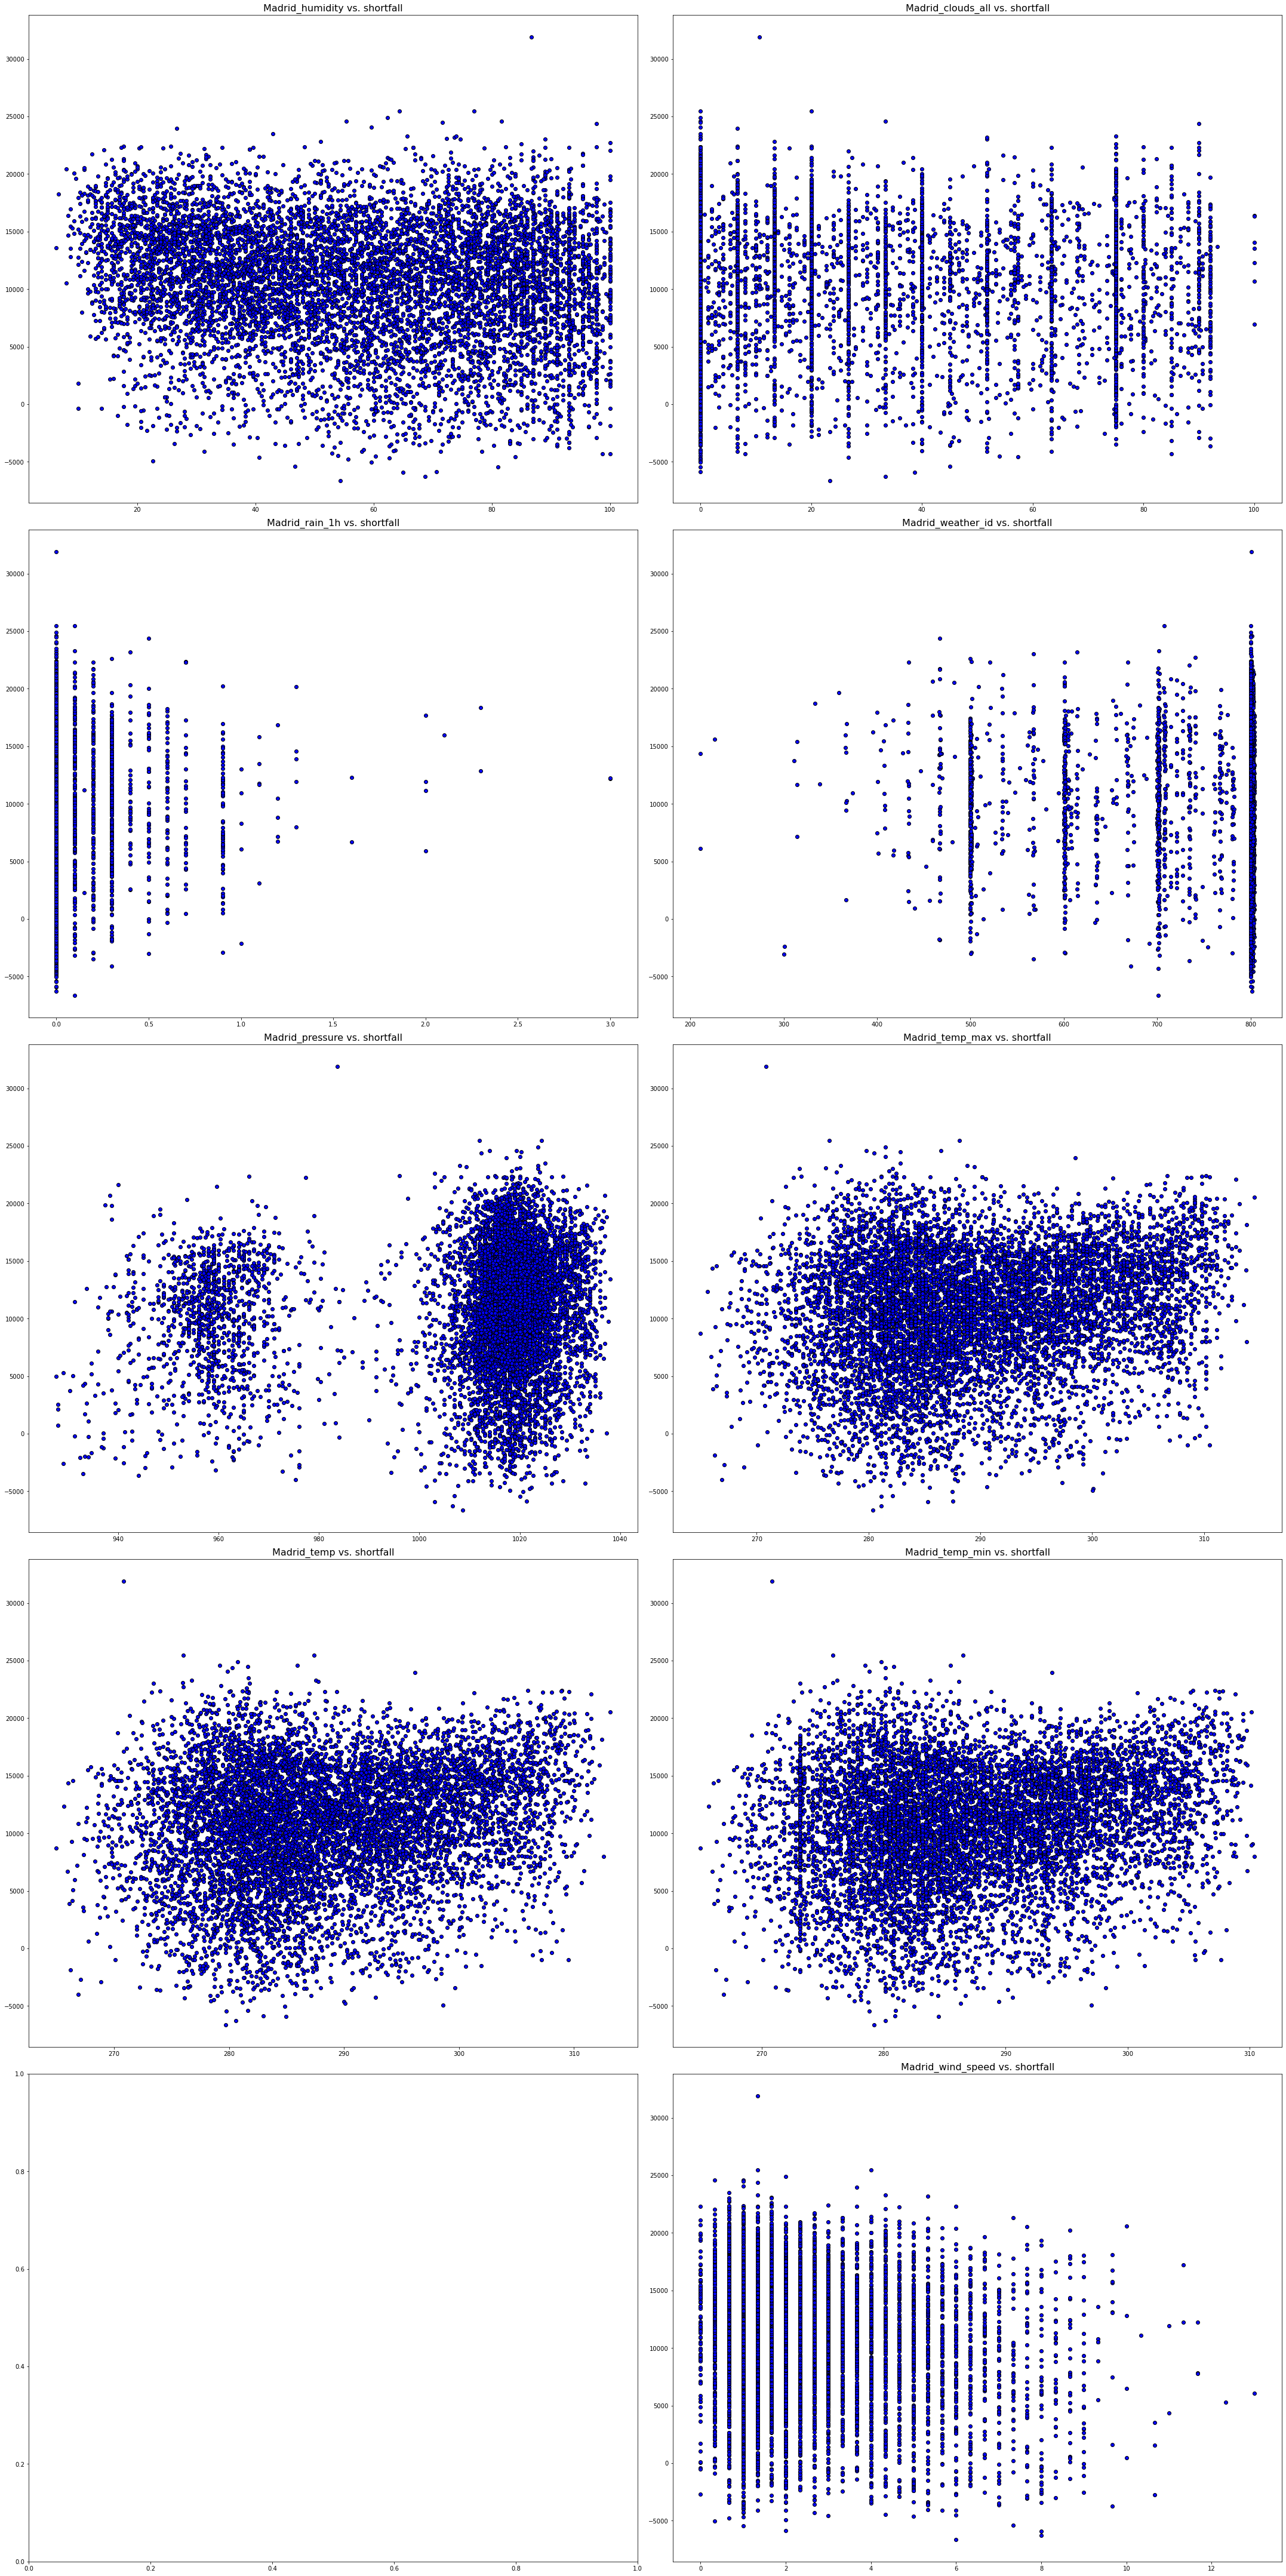

In [43]:
#Plot madrid data against shorfall
fig, axs = plt.subplots(5,2, figsize=(30,60),)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()

for index, column in enumerate(madrid_data.columns):
    axs[index-1].set_title("{} vs. shortfall".format(column),fontsize=16)
    axs[index-1].scatter(x=madrid_data[column],y=df_train['load_shortfall_3h'],color='blue',edgecolor='k')
    
fig.tight_layout(pad=1)

In [35]:
#group data by city (Valencia)
city_prop = [col for col in df_train if col.startswith('Valencia')]
valencia_data = df_train[city_prop]
valencia_data.head()


,Valencia_wind_deg,Valencia_wind_speed,Valencia_snow_3h,Valencia_pressure,Valencia_temp_max,Valencia_temp,Valencia_humidity,Valencia_temp_min
0,level_5,0.666667,0.0,1012.051407,269.888000,269.888000,75.666667,269.888000
1,level_10,1.666667,0.0,1012.051407,271.728333,271.728333,71.000000,271.728333
2,level_9,1.000000,0.0,1012.051407,278.008667,278.008667,65.666667,278.008667
3,level_8,1.000000,0.0,1012.051407,284.899552,284.899552,54.000000,284.899552
4,level_7,1.000000,0.0,1012.051407,283.015115,283.015115,58.333333,283.015115


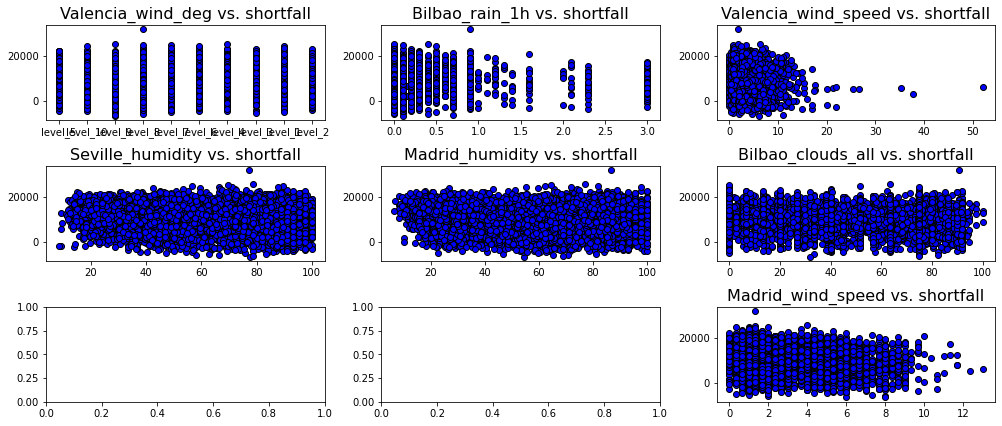

In [19]:
# plot relevant feature interactions
#Linearity check
fig, axs = plt.subplots(3,3, figsize=(14,6),)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()

for index, column in enumerate(df_train.columns[1:8]):
    axs[index-1].set_title("{} vs. shortfall".format(column),fontsize=16)
    axs[index-1].scatter(x=df_train[column],y=df_train['load_shortfall_3h'],color='blue',edgecolor='k')
    
fig.tight_layout(pad=1)

In [ ]:
# evaluate correlation

In [ ]:
# have a look at feature distributions

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [ ]:
# remove missing values/ features

In [ ]:
# create new features

In [ ]:
# engineer existing features

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [ ]:
# split data

In [ ]:
# create targets and features dataset

In [ ]:
# create one or more ML models

In [ ]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic